In [1]:
import pandas as pd 
import statsmodels.api as sm
import matplotlib
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline


In [2]:
df = pd.read_csv('train.csv', header=0)
df.head()


,date,store,item,sales
0,2013-01-01,1,1,13
1,2013-01-02,1,1,11
2,2013-01-03,1,1,14
3,2013-01-04,1,1,13
4,2013-01-05,1,1,10


In [3]:
print(df['date'].min(), df['date'].max())
df['date'] = pd.to_datetime(df['date'], format="%Y-%m-%d")


2013-01-01 2017-12-31


In [4]:
train_df = df[df['store']==1]
train_df = train_df[df['item']==1]
#train_df = train_df.set_index('date')
train_df['sales'] = train_df['sales'].astype(float)
train_df.head()


C:\Users\magic\Anaconda3\envs\pmdarima\lib\site-packages\ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


,date,store,item,sales
0,2013-01-01,1,1,13.0
1,2013-01-02,1,1,11.0
2,2013-01-03,1,1,14.0
3,2013-01-04,1,1,13.0
4,2013-01-05,1,1,10.0


In [5]:
import numpy as np
import scipy
import sys
salesdata=train_df['sales']

In [6]:
def fourierExtrapolation(x, n_predict):
    n = x.size
    n_harm = 10                    
    t = np.arange(0, n)
    p = np.polyfit(t, x, 1)          
    x_notrend = x - p[0] * t       
    x_freqdom = np.fft.fft(x_notrend)  
    f = np.fft.fftfreq(n)              
    indexes = list(range(n))
    #
    indexes.sort(key = lambda i: np.absolute(f[i]))
 
    t = np.arange(0, n + n_predict)
    restored_sig = np.zeros(t.size)
    for i in indexes[:1 + n_harm * 2]:
        ampli = np.absolute(x_freqdom[i]) / n   # amplitude
        phase = np.angle(x_freqdom[i])          # phase
        restored_sig += ampli * np.cos(2 * np.pi * f[i] * t + phase)
    return restored_sig + p[0] * t


In [27]:
len(salesdata[0:-365])

1461

In [29]:
len(salesdata)

1826

In [30]:
n_predict=365
pred = pd.Series(
    fourierExtrapolation(salesdata[0:-365], n_predict),
)

In [31]:
len(pred)

1826

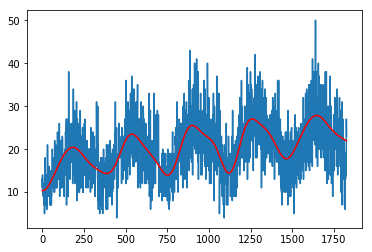

In [32]:
plt.plot(salesdata)
plt.plot(pred,color='red')

In [37]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from math import sqrt
expected = salesdata[-365:]
predictions = pred.tail(365)
mae = mean_absolute_error(expected, predictions)
print('MAE: %f' % mae)
mse = mean_squared_error(expected, predictions)
print('MSE: %f' % mse)
rmse = sqrt(mse)
print('RMSE: %f' % rmse)

MAE: 4.876729
MSE: 36.526716
RMSE: 6.043734
